In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# ** Stress Prediction**

In [4]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score, recall_score, f1_score,roc_auc_score,classification_report,mean_squared_error

In [5]:
data=pd.read_csv('data.csv')
data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology


In [6]:
data_1=data.copy()
data_1['major']=data_1['major'].replace(np.nan,'No Degree')
time = [i for i in data_1.iloc[:,0:126] if  'E' in i]
position = [i for i in data_1.iloc[:,0:126] if  'I' in i]
data_1=data_1.drop(position,axis=1)
data_1=data_1.drop(time,axis=1)
data_1=data_1.drop(data_1.iloc[:,43:47],axis=1)
data_2=data_1.copy()
data_2=data_2.drop(data_2.iloc[:,53:69],axis=1)
data_2=data_2.replace(to_replace=0,value=3)
data_2=data_2.rename(columns={'TIPI1':'Extraverted-enthusiastic','TIPI2':'Critical-quarrelsome',
                            'TIPI3':'Dependable-self_disciplined','TIPI4':'Anxious-easily upset',
                            'TIPI5':'Open to new experiences-complex','TIPI6':'Reserved-quiet',
                            'TIPI7':'Sympathetic-warm','TIPI8':'Disorganized-careless','TIPI9':'Calm-emotionally_stable',
                            'TIPI10':'Conventional-uncreative'})
print('Shape',data_2.shape)
print('Attributes',data_2.columns)

Shape (39775, 68)
Attributes Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 'country',
       'Extraverted-enthusiastic', 'Critical-quarrelsome',
       'Dependable-self_disciplined', 'Anxious-easily upset',
       'Open to new experiences-complex', 'Reserved-quiet', 'Sympathetic-warm',
       'Disorganized-careless', 'Calm-emotionally_stable',
       'Conventional-uncreative', 'education', 'urban', 'gender', 'engnat',
       'age', 'screensize', 'uniquenetworklocation', 'hand', 'religion',
       'orientation', 'race', 'voted', 'married', 'familysize', 'major'],
      dtype='object')


In [7]:
data_2=data_2.replace([np.inf, -np.inf], np.nan)
data_2=data_2.dropna()

In [8]:
def condition(x):
    if x<=10:
        return 'Under 10'
    if  10<=x<=16:
        return ' Primary Children'
    if 17<=x<=21:
        return 'Secondary Children'
    if 21<=x<=35:
        return 'Adults'
    if 36<=x<=48:
        return 'Elder Adults'
    if x>=49:
        return 'Older People'

data_2['Age_Groups']=data_2['age'].apply(condition)
data_2.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups
0,4,4,2,4,4,4,4,4,2,1,...,1,1,12,1,10,2,1,2,No Degree,Primary Children
1,4,1,2,3,4,4,3,4,3,2,...,1,2,7,3,70,2,1,4,No Degree,Primary Children
2,3,1,4,1,4,3,1,3,2,4,...,1,1,4,3,60,1,1,3,No Degree,Secondary Children
3,2,3,2,1,3,3,4,2,3,3,...,1,2,4,5,70,2,1,5,biology,Primary Children
4,2,2,3,4,4,2,4,4,4,3,...,2,3,10,1,10,2,1,4,Psychology,Secondary Children


In [9]:
new_data=data_2.iloc[:,42:]
data_3=data_2.filter(regex='Q\d{1,2}A')
data_3.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A
0,4,4,2,4,4,4,4,4,2,1,...,2,3,4,4,1,2,4,3,4,4
1,4,1,2,3,4,4,3,4,3,2,...,3,2,2,3,4,2,2,1,2,2
2,3,1,4,1,4,3,1,3,2,4,...,1,4,3,4,4,4,2,2,1,4
3,2,3,2,1,3,3,4,2,3,3,...,2,4,1,1,2,1,3,4,4,2
4,2,2,3,4,4,2,4,4,4,3,...,4,4,3,4,3,3,3,4,4,3


In [10]:
def sub(data_3):
    return data_3.subtract(1,axis=1)
data_3=sub(data_3) 
DASS_keys = {'Stress': [1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]}
Stress = []
for i in DASS_keys["Stress"]:
    Stress.append('Q'+str(i)+'A')
stress = data_3.filter(Stress)

In [11]:
def scores(source):
    col=list(source)
    source['Total_Count']=source[col].sum(axis=1)
    return source
stress=scores(stress)

In [12]:
Stress=pd.merge(stress,new_data,how='inner',left_index=True,right_index=True)
Stress.head()

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,...,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups
0,3,3,3,3,3,3,3,3,3,3,...,1,1,12,1,10,2,1,2,No Degree,Primary Children
1,3,3,3,1,1,3,1,2,2,2,...,1,2,7,3,70,2,1,4,No Degree,Primary Children
2,2,2,2,1,0,0,1,2,1,1,...,1,1,4,3,60,1,1,3,No Degree,Secondary Children
3,1,2,1,1,0,3,0,0,3,2,...,1,2,4,5,70,2,1,5,biology,Primary Children
4,1,1,3,1,3,3,3,2,1,1,...,2,3,10,1,10,2,1,4,Psychology,Secondary Children


In [13]:
def condition(x):
    if x<=14:
        return 'Normal'
    if  15<=x<=18:
        return 'Mild'
    if 19<=x<=25:
        return 'Moderate'
    if 26<=x<=33:
        return 'Severe'
    if x>=34:
        return 'Extremely Severe'

Stress['Condition']=Stress['Total_Count'].apply(condition)

Stress.head()

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,...,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups,Condition
0,3,3,3,3,3,3,3,3,3,3,...,1,12,1,10,2,1,2,No Degree,Primary Children,Extremely Severe
1,3,3,3,1,1,3,1,2,2,2,...,2,7,3,70,2,1,4,No Degree,Primary Children,Severe
2,2,2,2,1,0,0,1,2,1,1,...,1,4,3,60,1,1,3,No Degree,Secondary Children,Mild
3,1,2,1,1,0,3,0,0,3,2,...,2,4,5,70,2,1,5,biology,Primary Children,Mild
4,1,1,3,1,3,3,3,2,1,1,...,3,10,1,10,2,1,4,Psychology,Secondary Children,Severe


In [14]:
def change_var(x):
    if x=='Primary Children':
        return 0
    elif x=='Secondary Children':
        return 1
    elif x=='Adults':
        return 2
    elif x=='Elder Adults':
        return 3
    elif x=='Older People':
        return 4
    

    
Stress['Age_Groups']=Stress['Age_Groups'].apply(change_var)


In [15]:
Stress=Stress.dropna()


In [16]:
Stress=Stress.drop(columns=['Total_Count','country','age'])


In [17]:
scaler=MinMaxScaler()
X=Stress[['Q1A', 'Q6A', 'Q8A', 'Q11A', 'Q12A', 'Q14A', 'Q18A', 'Q22A', 'Q27A',
       'Q29A', 'Q32A', 'Q33A', 'Q35A', 'Q39A',
       'Extraverted-enthusiastic', 'Critical-quarrelsome',
       'Dependable-self_disciplined', 'Anxious-easily upset',
        'Open to new experiences-complex', 'Reserved-quiet', 'Sympathetic-warm',
        'Disorganized-careless', 'Calm-emotionally_stable',
        'Conventional-uncreative', 'education', 'urban', 'gender', 'engnat',
        'screensize', 'uniquenetworklocation', 'hand', 'religion',
        'orientation', 'race', 'voted', 'married', 'familysize',
        'Age_Groups']]
y=Stress[['Condition']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
import matplotlib.pyplot as plt

c:\Python\Python36\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.889
F1_Score: 0.885
Recall_Score: 0.889
Precision_Score: 0.89


c:\Python\Python36\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Python\Python36\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Python\Python36\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Python\Python36\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Cross Validation Score: 0.8906194780024586
                  precision    recall  f1-score   support

Extremely Severe     0.9709    0.8929    0.9302       448
            Mild     0.8442    0.5930    0.6967       457
        Moderate     0.7957    0.9144    0.8509       771
          Normal     0.9479    0.9799    0.9636      1095
          Severe     0.8824    0.9072    0.8946       711

        accuracy                         0.8886      3482
       macro avg     0.8882    0.8575    0.8672      3482
    weighted avg     0.8902    0.8886    0.8852      3482



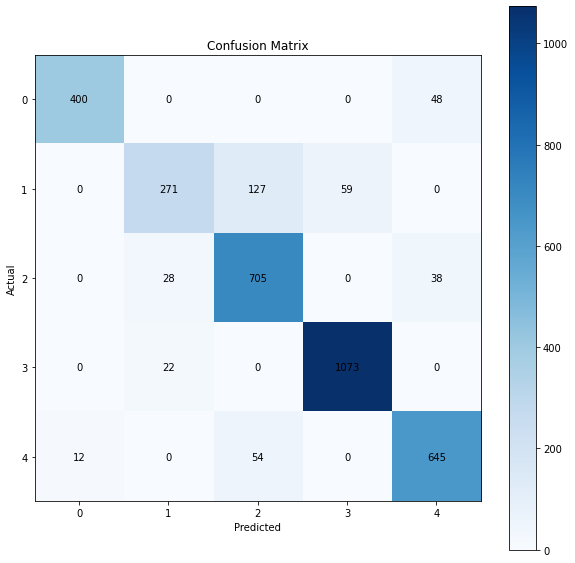

In [19]:
ran=RandomForestClassifier().fit(X_train_scaled,y_train)
acc_ran=round(accuracy_score(y_test,ran.predict(X_test_scaled)),3)
F1_ran=round(f1_score(y_test,ran.predict(X_test_scaled),average='weighted'),3)
prec_ran=round(precision_score(y_test,ran.predict(X_test_scaled),average='weighted'),3)
rec_ran=round(recall_score(y_test,ran.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',acc_ran)
print('F1_Score:',F1_ran)
print('Recall_Score:',rec_ran)
print('Precision_Score:',prec_ran)
print('Cross Validation Score:',(np.mean(cross_val_score(ran, X_train_scaled, y_train, cv = 6))))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=ran.predict(X_test_scaled))
print(classification)
confusion = confusion_matrix(y_test, ran.predict(X_test_scaled))
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(confusion, cmap=plt.cm.Blues)
for i in range(len(confusion)):
    for j in range(len(confusion[i])):
        text = ax.text(j, i, str(confusion[i, j]),
                       ha="center", va="center", color="black")

plt.colorbar(im)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.744
F1_Score: 0.745
Recall_Score: 0.744
Precision_Score: 0.746
Cross Validation Score: 0.7559924611869402
                  precision    recall  f1-score   support

Extremely Severe     0.8423    0.8348    0.8386       448
            Mild     0.4841    0.5011    0.4925       457
        Moderate     0.6716    0.6498    0.6605       771
          Normal     0.8860    0.8804    0.8832      1095
          Severe     0.7168    0.7370    0.7268       711

        accuracy                         0.7444      3482
       macro avg     0.7202    0.7206    0.7203      3482
    weighted avg     0.7456    0.7444    0.7449      3482



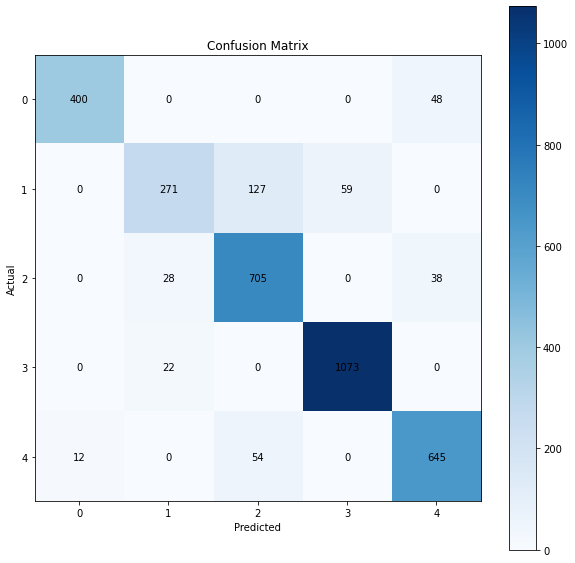

In [20]:
dt=DecisionTreeClassifier(criterion= 'entropy',max_depth= 80, min_samples_leaf= 9, min_samples_split=9).fit(X_train_scaled,y_train)
acc_dt=round(accuracy_score(y_test,dt.predict(X_test_scaled)),3)
F1_dt=round(f1_score(y_test,dt.predict(X_test_scaled),average='weighted'),3)
prec_dt=round(precision_score(y_test,dt.predict(X_test_scaled),average='weighted'),3)
rec_dt=round(recall_score(y_test,dt.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',acc_dt)
print('F1_Score:',F1_dt)
print('Recall_Score:',rec_dt)
print('Precision_Score:',prec_dt)
print('Cross Validation Score:',(np.mean(cross_val_score(dt, X_train_scaled, y_train, cv = 6))))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=dt.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(confusion, cmap=plt.cm.Blues)
for i in range(len(confusion)):
    for j in range(len(confusion[i])):
        text = ax.text(j, i, str(confusion[i, j]),
                       ha="center", va="center", color="black")

plt.colorbar(im)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

c:\Python\Python36\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Python36\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.858
F1_Score: 0.862
Recall_Score: 0.858
Precision_Score: 0.874


c:\Python\Python36\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Python36\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Python36\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Python36\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

Cross Validation Score: 0.8504675801182279
                  precision    recall  f1-score   support

Extremely Severe     0.9646    0.8527    0.9052       448
            Mild     0.6298    0.7965    0.7034       457
        Moderate     0.8234    0.8768    0.8492       771
          Normal     0.9873    0.8502    0.9136      1095
          Severe     0.8535    0.8931    0.8729       711

        accuracy                         0.8581      3482
       macro avg     0.8517    0.8539    0.8489      3482
    weighted avg     0.8738    0.8581    0.8624      3482



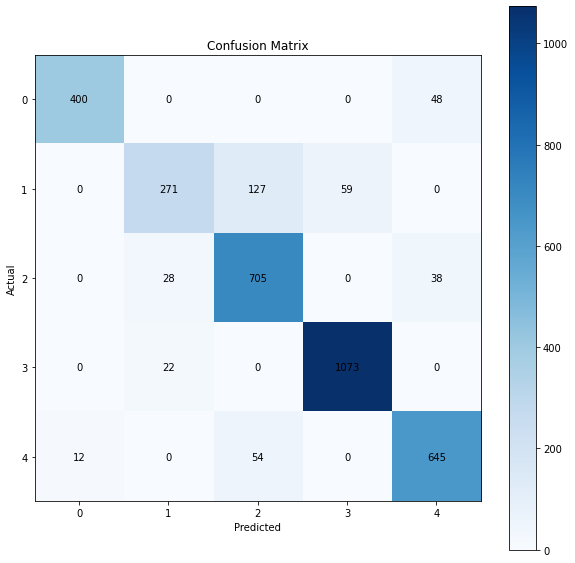

In [21]:
Gb=GaussianNB().fit(X_train_scaled,y_train)
acc_gb=round(accuracy_score(y_test,Gb.predict(X_test_scaled)),3)
F1_gb=round(f1_score(y_test,Gb.predict(X_test_scaled),average='weighted'),3)
prec_gb=round(precision_score(y_test,Gb.predict(X_test_scaled),average='weighted'),3)
rec_gb=round(recall_score(y_test,Gb.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',acc_gb)
print('F1_Score:',F1_gb)
print('Recall_Score:',rec_gb)
print('Precision_Score:',prec_gb)
print('Cross Validation Score:',(np.mean(cross_val_score(Gb, X_train_scaled, y_train, cv = 6))))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=Gb.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(confusion, cmap=plt.cm.Blues)
for i in range(len(confusion)):
    for j in range(len(confusion[i])):
        text = ax.text(j, i, str(confusion[i, j]),
                       ha="center", va="center", color="black")

plt.colorbar(im)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

c:\Python\Python36\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.853
F1_Score: 0.85
Recall_Score: 0.853
Precision_Score: 0.849


c:\Python\Python36\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Python36\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Python36\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Python36\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usin

Cross Validation Score: 0.8458077462314065
                  precision    recall  f1-score   support

Extremely Severe     0.9021    0.9464    0.9237       448
            Mild     0.6806    0.6061    0.6412       457
        Moderate     0.8190    0.8158    0.8174       771
          Normal     0.8954    0.9616    0.9273      1095
          Severe     0.8865    0.8242    0.8542       711

        accuracy                         0.8527      3482
       macro avg     0.8367    0.8308    0.8328      3482
    weighted avg     0.8494    0.8527    0.8501      3482



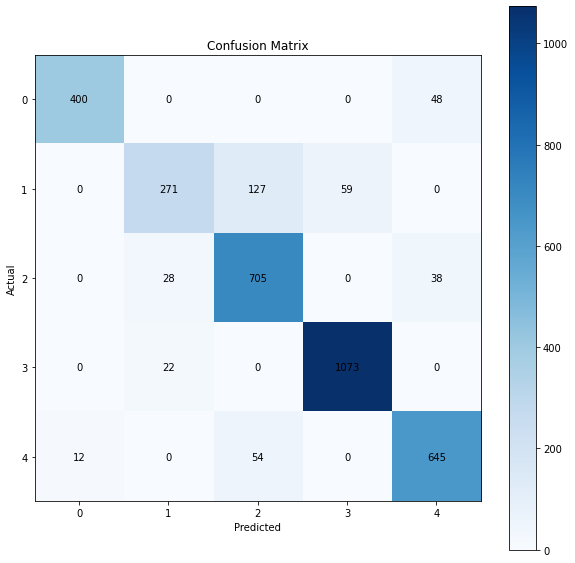

In [22]:
Knn=KNeighborsClassifier(n_neighbors=15).fit(X_train_scaled,y_train)
acc_knn=round(accuracy_score(y_test,Knn.predict(X_test_scaled)),3)
F1_knn=round(f1_score(y_test,Knn.predict(X_test_scaled),average='weighted'),3)
prec_knn=round(precision_score(y_test,Knn.predict(X_test_scaled),average='weighted'),3)
rec_knn=round(recall_score(y_test,Knn.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',acc_knn)
print('F1_Score:',F1_knn)
print('Recall_Score:',rec_knn)
print('Precision_Score:',prec_knn)
print('Cross Validation Score:',(np.mean(cross_val_score(Knn, X_train_scaled, y_train, cv = 6))))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=Knn.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(confusion, cmap=plt.cm.Blues)
for i in range(len(confusion)):
    for j in range(len(confusion[i])):
        text = ax.text(j, i, str(confusion[i, j]),
                       ha="center", va="center", color="black")

plt.colorbar(im)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

c:\Python\Python36\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.996
F1_Score: 0.996
Recall_Score: 0.996
Precision_Score: 0.996


c:\Python\Python36\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Python36\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Python36\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Python36\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

Cross Validation Score: 0.9976381301265135
                  precision    recall  f1-score   support

Extremely Severe     1.0000    1.0000    1.0000       448
            Mild     0.9912    0.9912    0.9912       457
        Moderate     0.9948    0.9896    0.9922       771
          Normal     0.9982    1.0000    0.9991      1095
          Severe     0.9944    0.9972    0.9958       711

        accuracy                         0.9960      3482
       macro avg     0.9957    0.9956    0.9957      3482
    weighted avg     0.9960    0.9960    0.9960      3482



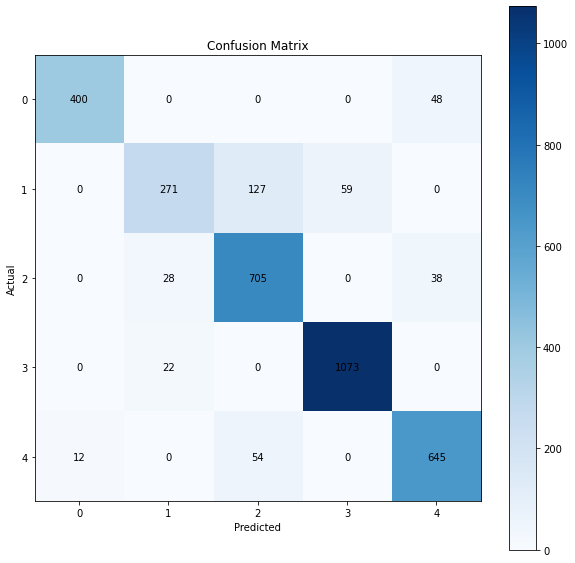

In [23]:
from sklearn.svm import SVC
Svm=SVC(C=10, gamma=0.01, kernel='sigmoid').fit(X_train_scaled,y_train)
acc_svm=round(accuracy_score(y_test,Svm.predict(X_test_scaled)),3)
F1_svm=round(f1_score(y_test,Svm.predict(X_test_scaled),average='weighted'),3)
prec_svm=round(precision_score(y_test,Svm.predict(X_test_scaled),average='weighted'),3)
rec_svm=round(recall_score(y_test,Svm.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',acc_svm)
print('F1_Score:',F1_svm)
print('Recall_Score:',rec_svm)
print('Precision_Score:',prec_svm)
print('Cross Validation Score:',(np.mean(cross_val_score(Svm, X_train_scaled, y_train, cv = 6))))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=Svm.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(confusion, cmap=plt.cm.Blues)
for i in range(len(confusion)):
    for j in range(len(confusion[i])):
        text = ax.text(j, i, str(confusion[i, j]),
                       ha="center", va="center", color="black")

plt.colorbar(im)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [24]:
Result_1={
                  'Model':['Random-Forest','Decision-Tree','GaussianNB','Nearest-Neighbors','SVM'],
                  'Accuracy(%)':[acc_ran*100,acc_dt*100,acc_gb*100,acc_knn*100,acc_svm*100],
                  'F1_Score(%)':[F1_ran*100,F1_dt*100,F1_gb*100,F1_knn*100,F1_svm*100],
                  'Precision(%)':[prec_ran*100,prec_dt*100,prec_gb*100,prec_knn*100,prec_svm*100],
                  'Recall(%)':[rec_ran*100,rec_dt*100,rec_gb*100,rec_knn*100,rec_svm*100]
                    }
Result_Stress=pd.DataFrame(Result_1)

In [25]:
Result_Stress

,Model,Accuracy(%),F1_Score(%),Precision(%),Recall(%)
0,Random-Forest,88.9,88.5,89.0,88.9
1,Decision-Tree,74.4,74.5,74.6,74.4
2,GaussianNB,85.8,86.2,87.4,85.8
3,Nearest-Neighbors,85.3,85.0,84.9,85.3
4,SVM,99.6,99.6,99.6,99.6


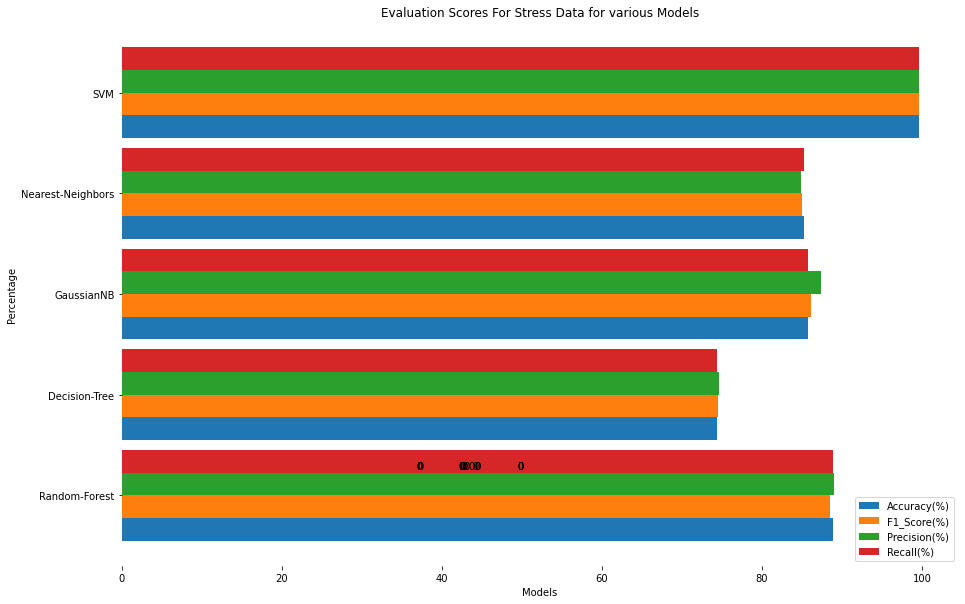

In [26]:
slot=Result_Stress.plot(x='Model',y=['Accuracy(%)','F1_Score(%)','Precision(%)','Recall(%)'],kind='barh',figsize=(15,10),width=0.9)
for p in slot.patches:
    slot.annotate(format(round(p.get_height()), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 7),
                   textcoords='offset points')
plt.title('Evaluation Scores For Stress Data for various Models')
plt.ylabel('Percentage')
plt.xlabel('Models')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

In [27]:
import pickle
pickle.dump(Svm, open('Stress_model.pkl','wb'))

In [28]:
model = pickle.load(open('Stress_model.pkl','rb'))